In [3]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("/kaggle/input/twitterdata/Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
df.shape

(14640, 15)

In [7]:
df=df[["text","airline_sentiment"]]

In [8]:
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [9]:
df.shape

(14640, 2)

In [10]:
df.isnull().sum()

text                 0
airline_sentiment    0
dtype: int64

In [11]:
df.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [12]:
df.airline_sentiment.value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [13]:
Unique_Labels=df.airline_sentiment.unique()
print(Unique_Labels)

['neutral' 'positive' 'negative']


In [14]:
Label_dict={}
for index,Label in enumerate(Unique_Labels):
    Label_dict[Label]=index
    
print(Label_dict)

{'neutral': 0, 'positive': 1, 'negative': 2}


In [15]:
df["airline_sentiment"]=df["airline_sentiment"].map(Label_dict)
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,0
3,@VirginAmerica it's really aggressive to blast...,2
4,@VirginAmerica and it's a really big bad thing...,2


In [16]:
print(df.airline_sentiment.unique())


data=df["airline_sentiment"].value_counts()
print(data)

[0 1 2]
airline_sentiment
2    9178
0    3099
1    2363
Name: count, dtype: int64


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 3 artists>

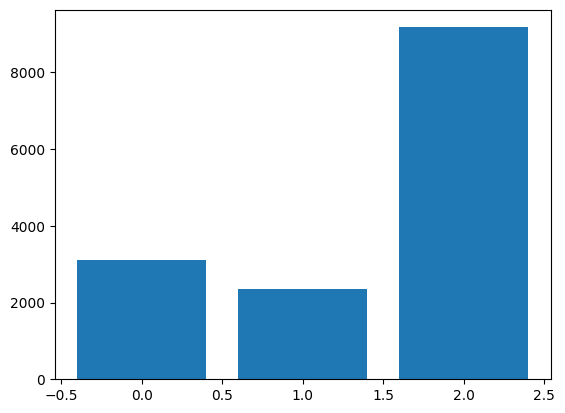

In [18]:
fig, ax = plt.subplots()
ax.bar(data.index, data.values)

In [19]:
import torch

In [20]:
X=df.index.values
Y=df["airline_sentiment"]
Y=torch.tensor(Y,dtype=torch.float32)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_temp,Y_train,Y_temp=train_test_split(X,Y,test_size=0.3,random_state=7,
                                               stratify=df.airline_sentiment.values)

X_test,X_val,Y_test,Y_val=train_test_split(X_temp,Y_temp,test_size=0.5,random_state=7)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)

(10248,)
(2196,)
(2196,)
torch.Size([10248])
torch.Size([2196])
torch.Size([2196])


In [24]:
Dataset=df.copy()

In [25]:
Dataset["data_set"]=["none"]*Dataset.shape[0]

In [26]:
Dataset.head()

,text,airline_sentiment,data_set
0,@VirginAmerica What @dhepburn said.,0,none
1,@VirginAmerica plus you've added commercials t...,1,none
2,@VirginAmerica I didn't today... Must mean I n...,0,none
3,@VirginAmerica it's really aggressive to blast...,2,none
4,@VirginAmerica and it's a really big bad thing...,2,none


In [27]:
Dataset.loc[X_train,"data_set"]="train"
Dataset.loc[X_test,"data_set"]="test"
Dataset.loc[X_val,"data_set"]="val"

In [28]:
Dataset.groupby(["airline_sentiment","data_set"]).count()

text
airline_sentiment data_set      
0                 test       463
                  train     2169
                  val        467
1                 test       346
                  train     1654
                  val        363
2                 test      1387
                  train     6425
                  val       1366

In [29]:
import torch
from torchtext.data.utils import get_tokenizer

In [28]:
tokenizer=get_tokenizer("basic_english")

In [29]:
Train_texts=Dataset[Dataset["data_set"]=="train"].text.values
Train_text_tokens=[tokenizer(text1) for text1 in Train_texts]

Test_texts=Dataset[Dataset["data_set"]=="test"].text.values
Test_text_tokens=[tokenizer(text2) for text2 in Test_texts]

Val_texts=Dataset[Dataset["data_set"]=="val"].text.values
Val_text_tokens=[tokenizer(text3) for text3 in Val_texts]

print(Train_texts.shape)
print(Test_texts.shape)
print(Val_texts.shape)
print("\n",Train_text_tokens[0])
print("\n",Test_text_tokens[0])
print("\n",Val_text_tokens[0])

(10248,)
(2196,)
(2196,)

 ['@virginamerica', 'what', '@dhepburn', 'said', '.']

 ['@virginamerica', 'so', 'excited', 'for', 'my', 'first', 'cross', 'country', 'flight', 'lax', 'to', 'mco', 'i', "'", 've', 'heard', 'nothing', 'but', 'great', 'things', 'about', 'virgin', 'america', '.', '#29daystogo']

 ['@virginamerica', 'sfo-pdx', 'schedule', 'is', 'still', 'mia', '.']


In [30]:
max_len=0
for sentence_sequence in Train_text_tokens:
    sentence_length=len(sentence_sequence)
    if sentence_length>max_len:
        max_len=sentence_length
        
print("Max_Length: ", max_len)

Max_Length:  40


In [31]:
from gensim.models import KeyedVectors
word_vectors=KeyedVectors.load_word2vec_format("/kaggle/input/word-vector/crawl-300d-2M.vec")

In [32]:
embedding_dim=word_vectors.vector_size
print(embedding_dim)

300


In [33]:
Train_embedding_vectors=[]
for Train_sentence_tokens in Train_text_tokens:
    Train_sentence_embeddings=[]
    for Train_word_tokens in Train_sentence_tokens:
        if Train_word_tokens in word_vectors.key_to_index:
            Train_word_embeddings=word_vectors[Train_word_tokens]
        else:
            Train_word_embeddings=np.zeros(embedding_dim)
        Train_sentence_embeddings.append(Train_word_embeddings)
    Train_embedding_vectors.append(Train_sentence_embeddings)
    
    
Test_embedding_vectors=[]
for Test_sentence_tokens in Test_text_tokens:
    Test_sentence_embeddings=[]
    for Test_word_tokens in Test_sentence_tokens:
        if Test_word_tokens in word_vectors.key_to_index:
            Test_word_embeddings=word_vectors[Test_word_tokens]
        else:
            Test_word_embeddings=np.zeros(embedding_dim)
        Test_sentence_embeddings.append(Test_word_embeddings)
    Test_embedding_vectors.append(Test_sentence_embeddings)
    
    
Val_embedding_vectors=[]
for Val_sentence_tokens in Val_text_tokens:
    Val_sentence_embedding=[]
    for Val_word_tokens in Val_sentence_tokens:
        if Val_word_tokens in word_vectors.key_to_index:
            Val_word_embedding=word_vectors[Val_word_tokens]
        else:
            Val_word_embedding=np.zeros(embedding_dim)
        Val_sentence_embedding.append(Val_word_embedding)
    Val_embedding_vectors.append(Val_sentence_embedding)

In [34]:
Train_embedding_tensors=[torch.tensor(train_vector,dtype=torch.float32) for train_vector in Train_embedding_vectors]
Test_embedding_tensors=[torch.tensor(test_vector,dtype=torch.float32) for test_vector in Test_embedding_vectors]
Val_embedding_tensors=[torch.tensor(Val_vector,dtype=torch.float32) for Val_vector in Val_embedding_vectors]

In [35]:
print(Train_text_tokens[0])
print(Train_embedding_vectors[0])

['@virginamerica', 'what', '@dhepburn', 'said', '.']
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [36]:
for i in Train_embedding_tensors[:10]:
    print(i.shape)

torch.Size([5, 300])
torch.Size([15, 300])
torch.Size([18, 300])
torch.Size([20, 300])
torch.Size([12, 300])
torch.Size([28, 300])
torch.Size([16, 300])
torch.Size([18, 300])
torch.Size([12, 300])
torch.Size([19, 300])


In [37]:
Sorted_train_tensors=sorted(Train_embedding_tensors, key=lambda x: len(x),reverse=True)
Sorted_test_tensors=sorted(Test_embedding_tensors, key=lambda x: len(x),reverse=True)
Sorted_val_tensors=sorted(Val_embedding_tensors,key=lambda x:len(x),reverse=True)

In [38]:
for i in Sorted_train_tensors[:10]:
    print(i.shape)

torch.Size([40, 300])
torch.Size([40, 300])
torch.Size([40, 300])
torch.Size([40, 300])
torch.Size([40, 300])
torch.Size([40, 300])
torch.Size([40, 300])
torch.Size([40, 300])
torch.Size([39, 300])
torch.Size([39, 300])


In [39]:
from torch.nn.utils.rnn import pad_sequence

In [40]:
Padded_train_tensors=pad_sequence(Sorted_train_tensors,batch_first=True)
Padded_test_tensors=pad_sequence(Sorted_test_tensors,batch_first=True)
Padded_val_tensors=pad_sequence(Sorted_val_tensors,batch_first=True)

In [41]:
for i in Padded_train_tensors[:5]:
    print(i.shape)

torch.Size([40, 300])
torch.Size([40, 300])
torch.Size([40, 300])
torch.Size([40, 300])
torch.Size([40, 300])


In [42]:
from torch.utils.data import TensorDataset,DataLoader

In [43]:
Train_dataset=TensorDataset(Padded_train_tensors,Y_train)
Test_dataset=TensorDataset(Padded_test_tensors,Y_test)
Val_dataset=TensorDataset(Padded_val_tensors,Y_val)

In [98]:
batch_size=64
Train_dataloader=DataLoader(Train_dataset,batch_size=batch_size,shuffle=True)
Test_dataloader=DataLoader(Test_dataset,batch_size=batch_size,shuffle=True)
Val_dataloader=DataLoader(Val_dataset,batch_size=batch_size,shuffle=True)

In [99]:
X_sample,Y_sample=next(iter(Train_dataloader))
print("sample input's size: ", X_sample.size())
print("Sample outputs's size: ",Y_sample.size())

print("\n\nX sample: ",X_sample)
print("\nY sample: ",Y_sample)

sample input's size:  torch.Size([64, 40, 300])
Sample outputs's size:  torch.Size([64])


X sample:  tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0231,  0.0170,  0.0157,  ...,  0.0744, -0.1118,  0.0963],
         [ 0.0337,  0.4250,  0.1008,  ..., -0.2765,  0.0654,  0.2152],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [-0.0450,  0.0315, -0.0231,  ..., -0.2131, -0.1496,  0.0471],
         [-0.4821,  0.0885, -0.0782,  ..., -0.0317, -0.1591, -0.1301],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0

In [100]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Model 1

In [47]:
import torch.nn as nn

In [48]:
class SimpleSentimentAnalysisModel(nn.Module):
    def __init__(self,embedding_dim,hidden_size,output_size):
        super(SimpleSentimentAnalysisModel,self).__init__()
        
        self.embedding_dim=embedding_dim
        self.hidden_size=hidden_size
        self.output_size=output_size
        
        self.lstm=nn.LSTM(embedding_dim,hidden_size,batch_first=True)
        self.relu=nn.ReLU()
        self.dropout=nn.Dropout(0.5)
        self.fc1=nn.Linear(hidden_size,output_size)
        
    def forward(self,x):
        H0=torch.zeros(1,x.size(0),self.hidden_size).to(x.device)
        C0=torch.zeros(1,x.size(0),self.hidden_size).to(x.device)
        
        out,_=self.lstm(x,(H0,C0))
        out=self.relu(out)
        out=self.dropout(out)
        out=self.fc1(out[:,-1,:])
        
        return out

In [49]:
hidden_size=128
output_size=3

In [50]:
Model1=SimpleSentimentAnalysisModel(embedding_dim,hidden_size,output_size)

In [51]:
Model1.to(device)

SimpleSentimentAnalysisModel(
  (lstm): LSTM(300, 128, batch_first=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=128, out_features=3, bias=True)
)

In [52]:
import torch.optim as optim
Criterion=nn.CrossEntropyLoss()
Optimizer=optim.Adam(Model1.parameters(),lr=0.001)

In [53]:
Epochs=10
Train_Losses=[]
Val_Losses=[]

def Model1_trainer(Model1, Train_dataloader, Val_dataloader, Criterion, Optimizer, Epochs):
    
    for Epoch in range(Epochs):
        Model1.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        for inputs, labels in Train_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            Optimizer.zero_grad()
            inputs = inputs.float()
            outputs = Model1(inputs)

            labels = labels.long()
            Loss = Criterion(outputs, labels)
            Loss.backward()
            Optimizer.step()

            _, Predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (Predicted == labels).sum().item()

            train_loss += Loss.item()

        train_accuracy = train_correct / train_total
        train_loss/=len(Train_dataloader)
        Train_Losses.append(train_loss)

        Model1.eval()
        Val_loss = 0.0
        Val_correct = 0
        Val_total = 0

        with torch.no_grad():
            for inputs, labels in Val_dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                inputs = inputs.float()
                outputs = Model1(inputs)
                labels = labels.long()
                Vloss = Criterion(outputs, labels)

                _, Predicted = torch.max(outputs, 1)
                Val_total += labels.size(0)
                Val_correct += (Predicted == labels).sum().item()
                
                Val_loss+=Vloss.item()

        Val_accuracy = Val_correct / Val_total
        Val_loss /= len(Val_dataloader)
        Val_Losses.append(Val_loss)

        print(f"Epoch [{Epoch+1}/{Epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {Val_loss:.4f}, Val Accuracy: {Val_accuracy:.4f}")

In [54]:
Trainer=Model1_trainer(Model1,Train_dataloader,Val_dataloader,Criterion,Optimizer,Epochs)

Epoch [1/10], Train Loss: 0.9296, Train Accuracy: 0.6263, Val Loss: 0.9305, Val Accuracy: 0.6220
Epoch [2/10], Train Loss: 0.9250, Train Accuracy: 0.6270, Val Loss: 0.9229, Val Accuracy: 0.6220
Epoch [3/10], Train Loss: 0.9228, Train Accuracy: 0.6270, Val Loss: 0.9241, Val Accuracy: 0.6220
Epoch [4/10], Train Loss: 0.9195, Train Accuracy: 0.6270, Val Loss: 0.9212, Val Accuracy: 0.6220
Epoch [5/10], Train Loss: 0.9190, Train Accuracy: 0.6270, Val Loss: 0.9221, Val Accuracy: 0.6220
Epoch [6/10], Train Loss: 0.9179, Train Accuracy: 0.6272, Val Loss: 0.9243, Val Accuracy: 0.6220
Epoch [7/10], Train Loss: 0.9183, Train Accuracy: 0.6273, Val Loss: 0.9232, Val Accuracy: 0.6220
Epoch [8/10], Train Loss: 0.9179, Train Accuracy: 0.6267, Val Loss: 0.9228, Val Accuracy: 0.6220
Epoch [9/10], Train Loss: 0.9181, Train Accuracy: 0.6273, Val Loss: 0.9230, Val Accuracy: 0.6220
Epoch [10/10], Train Loss: 0.9143, Train Accuracy: 0.6277, Val Loss: 0.9220, Val Accuracy: 0.6220


In [55]:
def calculate_accuracy(Model1, Train_dataloader):
    Model1.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in Train_dataloader:
            inputs=inputs.to(device)
            labels=labels.to(device)
            outputs = Model1(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = correct / total
    return accuracy

accuracy = calculate_accuracy(Model1, Train_dataloader)
print(f"Accuracy on Train set: {accuracy}")

Accuracy on Train set: 0.6287080405932864


In [56]:
def calculate_accuracy(Model1, Test_dataloader):
    Model1.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in Test_dataloader:
            inputs=inputs.to(device)
            labels=labels.to(device)
            outputs = Model1(inputs)
            _, predicted = torch.max(outputs, 1)  # Get the index of the highest probability
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = correct / total
    return accuracy


accuracy = calculate_accuracy(Model1, Test_dataloader)
print(f"Accuracy on Test set: {accuracy}")

Accuracy on Test set: 0.6311475409836066


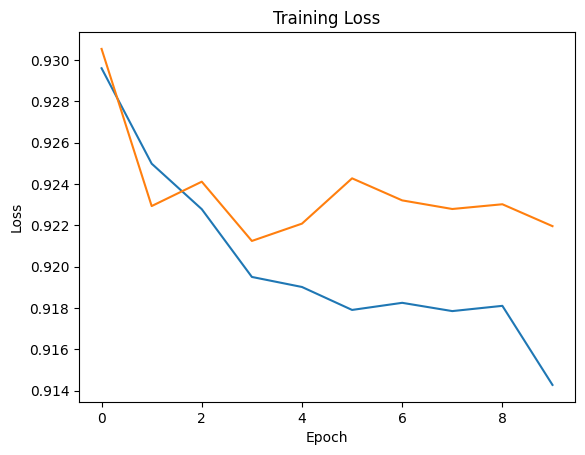

In [60]:
plt.plot(Train_Losses)
plt.plot(Val_Losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [58]:
def predict_sentiment(Model1, tokenizer, sentence, max_len,Label_dict):
    # Tokenize the sentence
    Testing_text_tokens = tokenizer(sentence)
    print("Tokens: ",Testing_text_tokens)
    
    Testing_embedding_vectors=[]
    for Testing_word_tokens in Testing_text_tokens:
        if Testing_word_tokens in word_vectors.key_to_index:
            Testing_word_embeddings=word_vectors[Testing_word_tokens]
        else:
            Testing_word_embeddings=np.zeros(embedding_dim)
        Testing_embedding_vectors.append(Testing_word_embeddings)
        
    print("Data Type: ",type(Testing_embedding_vectors))
    
    Testing_embedding_vectors = torch.tensor(Testing_embedding_vectors)
    Testing_embedding_vectors = Testing_embedding_vectors.unsqueeze(0)
    Testing_embedding_vectors = Testing_embedding_vectors.to(device)
    
    # Perform inference
    with torch.no_grad():
        Model1.eval()
        outputs = Model1(Testing_embedding_vectors)
    
    predicted_label = torch.argmax(outputs, dim=1).item()
    predicted_text_label=Label_dict[predicted_label]
    
    return predicted_text_label

sentence = "This airline provides good service."
Label_dict = { 0: 'neutral',1: 'positive',2: 'negative'}
device = next(Model1.parameters()).device
predicted_text_label = predict_sentiment(Model1, tokenizer, sentence, max_len,Label_dict)
print("Predicted sentiment label:", predicted_text_label)

Tokens:  ['this', 'airline', 'provides', 'good', 'service', '.']
Data Type:  <class 'list'>
Predicted sentiment label: positive


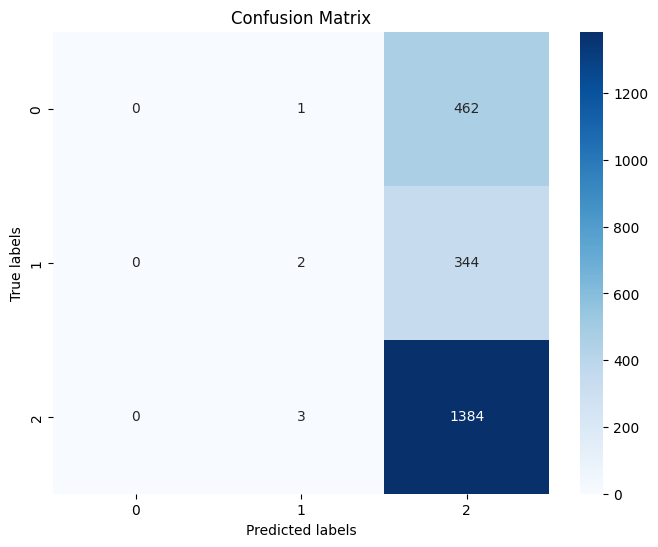

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Get true labels and predicted labels
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in Test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = Model1(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Define your class labels (assuming they are numeric)
class_labels = { 0: 'neutral',1: 'positive',2: 'negative'}

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_labels)


# Model 2 Example.

In [101]:
class SentimentAnalysisModel2(nn.Module):
    def __init__(self,embedding_dim,hidden_size,output_size):
        super(SentimentAnalysisModel2,self).__init__()
        
        self.embedding_dim=embedding_dim
        self.hidden_size=hidden_size
        self.output_size=output_size
        
        self.fc1=nn.Linear(embedding_dim,hidden_size)
        self.relu=nn.ReLU()
        self.lstm=nn.LSTM(hidden_size,hidden_size,batch_first=True)
        self.dropout=nn.Dropout(0.1)
        self.fc2=nn.Linear(hidden_size,output_size)
        #self.softmax=nn.Softmax(dim=1)
        
    def forward(self,x):
        H0=torch.zeros(1,x.size(0),self.hidden_size).to(device)
        C0=torch.zeros(1,x.size(0),self.hidden_size).to(device)
        
        x=self.fc1(x)
        x=self.relu(x)
        x,_=self.lstm(x,(H0,C0))
        x=x[:,-1,:]
        x=self.dropout(x)
        x=self.fc2(x)
        #x=self.softmax(x)
        
        return x

In [102]:
Model2=SentimentAnalysisModel2(embedding_dim,hidden_size,output_size)

In [103]:
Model2.to(device)

SentimentAnalysisModel2(
  (fc1): Linear(in_features=300, out_features=128, bias=True)
  (relu): ReLU()
  (lstm): LSTM(128, 128, batch_first=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [104]:
from transformers import AdamW

In [105]:
Criterion2=nn.CrossEntropyLoss()
Optimizer2=AdamW(Model2.parameters(),
                eps=1e-6)

In [106]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [107]:
scheduler=ReduceLROnPlateau(Optimizer2,mode="min",factor=0.5,patience=3,verbose=True)

In [108]:
Epochs=10
Train_Losses=[]
Val_Losses=[]

def Model2_trainer(Model2, Train_dataloader, Val_dataloader, Criterion2, Optimizer2, Epochs):
    
    for Epoch in range(Epochs):
        Model2.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        for inputs, labels in Train_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            Optimizer2.zero_grad()
            inputs = inputs.float()
            outputs = Model2(inputs)

            labels = labels.long()
            Loss = Criterion2(outputs, labels)
            Loss.backward()
            Optimizer2.step()

            _, Predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (Predicted == labels).sum().item()

            train_loss += Loss.item()

        train_accuracy = train_correct / train_total
        train_loss/=len(Train_dataloader)
        Train_Losses.append(train_loss)
        
        scheduler.step(train_loss)

        Model2.eval()
        Val_loss = 0.0
        Val_correct = 0
        Val_total = 0

        with torch.no_grad():
            for inputs, labels in Val_dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                inputs = inputs.float()
                outputs = Model2(inputs)
                labels = labels.long()
                Vloss = Criterion(outputs, labels)

                _, Predicted = torch.max(outputs, 1)
                Val_total += labels.size(0)
                Val_correct += (Predicted == labels).sum().item()
                
                Val_loss+=Vloss.item()
                
        scheduler.step(Val_loss)

        Val_accuracy = Val_correct / Val_total
        Val_loss /= len(Val_dataloader)
        Val_Losses.append(Val_loss)

        print(f"Epoch [{Epoch+1}/{Epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {Val_loss:.4f}, Val Accuracy: {Val_accuracy:.4f}")

In [109]:
final_lr=Optimizer2.param_groups[0]["lr"]
print("final learning rate: ",final_lr)

final learning rate:  0.001


In [110]:
Model2_trainer(Model2,Train_dataloader,Val_dataloader,Criterion2,Optimizer2,Epochs)

Epoch [1/10], Train Loss: 0.9269, Train Accuracy: 0.6238, Val Loss: 0.9297, Val Accuracy: 0.6220
Epoch [2/10], Train Loss: 0.9178, Train Accuracy: 0.6270, Val Loss: 0.9210, Val Accuracy: 0.6220
Epoch [3/10], Train Loss: 0.9137, Train Accuracy: 0.6270, Val Loss: 0.9344, Val Accuracy: 0.6220
Epoch [4/10], Train Loss: 0.9178, Train Accuracy: 0.6271, Val Loss: 0.9256, Val Accuracy: 0.6216
Epoch 00009: reducing learning rate of group 0 to 5.0000e-04.
Epoch [5/10], Train Loss: 0.9176, Train Accuracy: 0.6275, Val Loss: 0.9204, Val Accuracy: 0.6216
Epoch [6/10], Train Loss: 0.9153, Train Accuracy: 0.6280, Val Loss: 0.9228, Val Accuracy: 0.6216
Epoch 00013: reducing learning rate of group 0 to 2.5000e-04.
Epoch [7/10], Train Loss: 0.9145, Train Accuracy: 0.6277, Val Loss: 0.9230, Val Accuracy: 0.6216
Epoch [8/10], Train Loss: 0.9142, Train Accuracy: 0.6280, Val Loss: 0.9282, Val Accuracy: 0.6211
Epoch [9/10], Train Loss: 0.9111, Train Accuracy: 0.6280, Val Loss: 0.9228, Val Accuracy: 0.6211
Epo

# Model 3

In [30]:
from transformers import BertTokenizer

In [31]:
Tokenizer=BertTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [32]:
max_len=40

In [33]:
Encoded_train_text=Tokenizer.batch_encode_plus(Dataset[Dataset["data_set"]=="train"].text.values,
                                                  max_length=max_len,
                                                  add_special_tokens=True,
                                                  return_token_type_ids=True,
                                                  return_tensors="pt",
                                                  return_attention_mask=True,
                                                  pad_to_max_length=True,
                                                  truncation=True)

In [34]:
Encoded_test_text=Tokenizer.batch_encode_plus(Dataset[Dataset["data_set"]=="test"].text.values,
                                                max_length=max_len,
                                                add_special_tokens=True,
                                                return_token_type_ids=True,
                                                return_tensors="pt",
                                                return_attention_mask=True,
                                                pad_to_max_length=True,
                                                truncation=True)

In [35]:
Encoded_val_text=Tokenizer.batch_encode_plus(Dataset[Dataset["data_set"]=="val"].text.values,
                                               max_length=max_len,
                                               add_special_tokens=True,
                                               return_token_type_ids=True,
                                               return_tensors="pt",
                                               return_attention_mask=True,
                                               pad_to_max_length=True,
                                               truncation=True)

In [36]:
Encoded_train_text

{'input_ids': tensor([[  101,  1030,  6261,  ...,     0,     0,     0],
        [  101,  1030,  6261,  ...,     0,     0,     0],
        [  101,  1030,  6261,  ...,     0,     0,     0],
        ...,
        [  101,  1030, 25988,  ...,     0,     0,     0],
        [  101,  1030, 25988,  ...,     0,     0,     0],
        [  101,  1030, 25988,  ...,  1029,   102,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 0]])}

In [37]:
Encoded_test_text

{'input_ids': tensor([[  101,  1030,  6261,  ...,     0,     0,     0],
        [  101,  1030,  6261,  ...,     0,     0,     0],
        [  101,  1030,  6261,  ...,     0,     0,     0],
        ...,
        [  101,  1030, 25988,  ...,  2393,  1029,   102],
        [  101,  1030, 25988,  ...,     0,     0,     0],
        [  101,  1030, 25988,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [38]:
Encoded_val_text

{'input_ids': tensor([[  101,  1030,  6261,  ...,     0,     0,     0],
        [  101,  1030,  6261,  ...,     0,     0,     0],
        [  101,  1030,  6261,  ...,     0,     0,     0],
        ...,
        [  101,  1030, 25988,  ...,     0,     0,     0],
        [  101,  1030, 25988,  ...,  1012,   102,     0],
        [  101,  1030, 25988,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [39]:
Train_input_ids=torch.tensor(Encoded_train_text["input_ids"])
Train_attention_mask=torch.tensor(Encoded_train_text["attention_mask"])
Train_labels=torch.tensor(Dataset[Dataset["data_set"]=="train"].airline_sentiment.values)

In [40]:
Test_input_ids=torch.tensor(Encoded_test_text["input_ids"])
Test_attention_mask=torch.tensor(Encoded_test_text["attention_mask"])
Test_labels=torch.tensor(Dataset[Dataset["data_set"]=="test"].airline_sentiment.values)

In [41]:
Val_input_ids=torch.tensor(Encoded_val_text["input_ids"])
Val_attention_mask=torch.tensor(Encoded_val_text["attention_mask"])
Val_labels=torch.tensor(Dataset[Dataset["data_set"]=="val"].airline_sentiment.values)

In [42]:
from torch.utils.data import TensorDataset,DataLoader,RandomSampler

In [43]:
Train_dataset=TensorDataset(Train_input_ids,Train_attention_mask,Train_labels)
Test_dataset=TensorDataset(Test_input_ids,Test_attention_mask,Test_labels)
Val_dataset=TensorDataset(Val_input_ids,Val_attention_mask,Val_labels)

In [44]:
batch_size=64

In [45]:
Train_Dataloader=DataLoader(Train_dataset,batch_size=batch_size,sampler=RandomSampler(Train_dataset))
Test_Dataloader=DataLoader(Test_dataset,batch_size=batch_size,sampler=RandomSampler(Test_dataset))
Val_Dataloader=DataLoader(Val_dataset,batch_size=batch_size,sampler=RandomSampler(Val_dataset))

In [46]:
from transformers import BertForSequenceClassification

In [47]:
Model_name=BertForSequenceClassification.from_pretrained("bert-base-uncased")

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [48]:
import torch.nn as nn

In [49]:
class BertSentimentAnalysisModel3(nn.Module):
    def __init__(self,hidden_size,output_size):
        super(BertSentimentAnalysisModel3,self).__init__()
        
        self.hidden_size=hidden_size
        self.output_size=output_size
        
        self.bert_model=BertForSequenceClassification.from_pretrained("bert-base-uncased",num_labels=output_size)
        #self.dropout=nn.Dropout(0.1)
        self.fc1=nn.Linear(3,hidden_size)
        self.relu=nn.ReLU()
        self.fc2=nn.Linear(hidden_size,output_size)
        
    def forward(self,input_ids,attention_mask):
        outputs=self.bert_model(input_ids,attention_mask)
        
        Bert_logits=outputs.logits
        batch_size, _=Bert_logits.shape
        Bert_logits = Bert_logits.view(batch_size,-1)
        x=self.fc1(Bert_logits)
        x=self.relu(x)
        x=self.fc2(x)
        
        return x

In [50]:
#input_size=Model_name.config.hidden_size
hidden_size=64
output_size=3

In [51]:
Model3=BertSentimentAnalysisModel3(hidden_size=hidden_size,
                                  output_size=output_size)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [52]:
print(Model3)

BertSentimentAnalysisModel3(
  (bert_model): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768,

In [53]:
from transformers import AdamW

In [54]:
Criterion3=nn.CrossEntropyLoss()
Optimizer3=AdamW(Model3.parameters(),
                lr=1e-5,
                eps=1e-6)

scheduler3=ReduceLROnPlateau(Optimizer3,mode="min",factor=0.5,patience=3,verbose=True)

In [55]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [56]:
Model3=Model3.to(device)

In [57]:
LOSSES = []
EPOCHS = 20

def Model3_trainer(Model3, Criterion3, Optimizer3, Train_Dataloader, EPOCHS, device):
    for input_ids,attention_mask,labels in Train_Dataloader:
        print("Shape of input ids: ",input_ids.shape)
        print("Shape of attention mask: ",attention_mask.shape)
        print("shape of labels: ",labels.shape)
        break
        
    for epoch in range(EPOCHS):
        Model3.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for input_ids, attention_mask, labels in Train_Dataloader:
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)
            
            Optimizer3.zero_grad()
            outputs = Model3(input_ids, attention_mask)
            loss = Criterion3(outputs, labels)
            loss.backward()
            Optimizer3.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
        
        train_loss /= len(Train_Dataloader)
        train_accuracy = train_correct / train_total
        #scheduler3.step(train_loss)
        
        Model3.eval()
        VAL_LOSS=0.0
        VAL_ACCURACY=0.0
        VAL_TOTAL=0
        VAL_CORRECT=0
        
        with torch.no_grad():
            for input_ids,attention_layer,labels in Val_Dataloader:
                input_ids=input_ids.to(device)
                attention_layer=attention_layer.to(device)
                labels=labels.to(device)
                
                outputs=Model3(input_ids,attention_layer)
                Loss=Criterion3(outputs,labels)
                VAL_LOSS+=Loss.item()
                
                _,predicted=torch.max(outputs,1)
                VAL_TOTAL += labels.size(0)
                VAL_CORRECT+=(predicted==labels).sum().item()
                
            VAL_LOSS/=len(Val_Dataloader)
            VAL_ACCURACY=VAL_CORRECT/VAL_TOTAL
            #scheduler3.step(VAL_LOSS)
        
        print(f"Epoch: {epoch+1}/{EPOCHS}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f},Validation Loss: {VAL_LOSS:.4f}, Validation Accuracy: {VAL_ACCURACY:.4f}")
        LOSSES.append(train_loss)

Final_Lr=Optimizer3.param_groups[0]["lr"]
print("final learning rate: ",Final_Lr)

In [58]:
Model3_trainer(Model3,Criterion3,Optimizer3,Train_Dataloader,EPOCHS,device)

Shape of input ids:  torch.Size([64, 40])
Shape of attention mask:  torch.Size([64, 40])
shape of labels:  torch.Size([64])
Epoch: 1/20, Train Loss: 0.9511, Train Accuracy: 0.5911,Validation Loss: 0.7710, Validation Accuracy: 0.7127


KeyboardInterrupt: 

In [227]:
def bert_predict_sentiment(Model3, Tokenizer, sentence1, max_len,Label_dict):
    Test_text_tokens = Tokenizer(sentence, max_length=max_len, truncation=True, padding=True, return_tensors="pt")
    Test_input_ids = Test_text_tokens['input_ids'].to(device)
    Test_attention_mask = Test_text_tokens['attention_mask'].to(device)
    
    print(Test_input_ids.shape)
    
    # Perform inference
    with torch.no_grad():
        Model3.eval()
        outputs = Model3(Test_input_ids,Test_attention_mask)
    
    predicted_label = torch.argmax(outputs, dim=1).item()
    predicted_text_label=Label_dict[predicted_label]
    
    return predicted_text_label

In [228]:
sentence1 = "This airline provides excellent service."
Label_dict = { 0: 'neutral',1: 'positive',2: 'negative'}
device = next(Model3.parameters()).device
predicted_text_label = bert_predict_sentiment(Model3, Tokenizer, sentence1, max_len,Label_dict)
print("Predicted sentiment label:", predicted_text_label)

torch.Size([1, 8])
Predicted sentiment label: positive


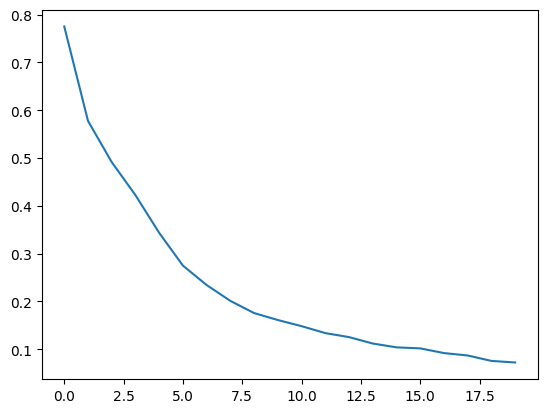

In [229]:
plt.plot(LOSSES)

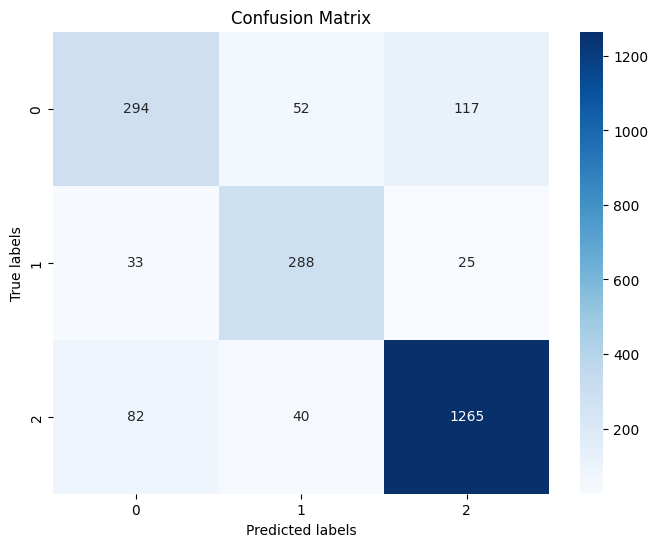

In [215]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predicted labels
y_true = []
y_pred = []

with torch.no_grad():
    for input_ids, attention_mask,labels in Test_Dataloader:
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        outputs = Model3(input_ids,attention_mask)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Define your class labels (assuming they are numeric)
class_labels = { 0: 'neutral',1: 'positive',2: 'negative'}

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_labels)

# Model 4

In [59]:
from transformers import BertModel

In [60]:
class SentimentAnalysisModel4(nn.Module):
    def __init__(self,hidden_size,output_size):
        super(SentimentAnalysisModel4,self).__init__()
    
        self.hidden_size=hidden_size
        self.output_size=output_size
    
        self.bert_model=BertModel.from_pretrained("bert-base-uncased",num_labels=output_size)
        self.fc1=nn.Linear(self.bert_model.config.hidden_size,hidden_size)
        self.relu=nn.ReLU()
        self.fc2=nn.Linear(hidden_size,output_size)
        self.dropout=nn.Dropout()
    
    def forward(self,input_ids,attention_mask):
        outputs=self.bert_model(input_ids,attention_mask)
        bert_last_hidden_state=outputs.last_hidden_state
        batch_size,sequence_length,hidden_size=bert_last_hidden_state.shape
        bert_last_hidden_state=bert_last_hidden_state.view(batch_size,-1,hidden_size)
        
        x=self.fc1(bert_last_hidden_state)
        x=self.relu(x)
        x=self.dropout(x)
        x=self.fc2(x)
        
        return x

In [61]:
hidden_size=128
output_size=3

In [62]:
Model4=SentimentAnalysisModel4(hidden_size=hidden_size,
                              output_size=output_size)

In [63]:
Model4.to(device)

SentimentAnalysisModel4(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [64]:
from transformers import AdamW

In [65]:
Criterion4=nn.CrossEntropyLoss()
Optimizer4=AdamW(Model4.parameters(),
                lr=1e-5,
                eps=1e-6)

In [70]:
LOSSES = []
EPOCHS = 20

def Model4_trainer(Model4, Criterion4, Optimizer4, Train_Dataloader, Val_Dataloader, EPOCHS, device):
    for input_ids,attention_mask,labels in Train_Dataloader:
        print("input ids shape: ",input_ids.shape)
        print("attention_mask: ",attention_mask.shape)
        print("labels: ",labels.shape)
        break
        
    for epoch in range(EPOCHS):
        Model4.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for input_ids, attention_mask, labels in Train_Dataloader:
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)
            
            Optimizer4.zero_grad()
            outputs = Model4(input_ids, attention_mask)
            loss = Criterion4(outputs, labels)
            loss.backward()
            Optimizer4.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
        
        train_loss /= len(Train_Dataloader)
        train_accuracy = train_correct / train_total
        
        Model4.eval()
        VAL_LOSS=0.0
        VAL_ACCURACY=0.0
        VAL_TOTAL=0
        VAL_CORRECT=0
        
        with torch.no_grad():
            for input_ids,attention_layer,labels in Val_Dataloader:
                input_ids=input_ids.to(device)
                attention_layer=attention_layer.to(device)
                labels=labels.to(device)
                
                outputs=Model4(input_ids,attention_layer)
                Loss=Criterion4(outputs,labels)
                VAL_LOSS+=Loss.item()
                
                _,predicted=torch.max(outputs,1)
                VAL_TOTAL += labels.size(0)
                VAL_CORRECT+=(predicted==labels).sum().item()
                
            VAL_LOSS/=len(Val_Dataloader)
            VAL_ACCURACY=VAL_CORRECT/VAL_TOTAL
        
        print(f"Epoch: {epoch+1}/{EPOCHS}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f},Validation Loss: {VAL_LOSS:.4f}, Validation Accuracy: {VAL_ACCURACY:.4f}")
        LOSSES.append(train_loss)


In [71]:
Model4_trainer(Model4,Criterion4,Optimizer4,Train_Dataloader,Val_Dataloader,EPOCHS,device)

input ids shape:  torch.Size([64, 40])
attention_mask:  torch.Size([64, 40])
labels:  torch.Size([64])


RuntimeError: Expected target size [64, 3], got [64]